In [ ]:
# BAM

from bam_gym.envs import GraspNetEnv
from bam_utils.o3d_helper import o3d_view_rgbd_mask
from bam_gym.ros_types.converter import segment2d_array_to_mask_img
from bam_utils.matplotlib_helper import plot_rgbd_mask
from bam_gym.ros_types.sensor_msgs import CompressedImage, Image, CameraInfo
# PYTHON
import numpy as np
import open3d as o3d
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
env = GraspNetEnv("/home/bam/graspnetAPI/graspnet", render_mode="human")

Loading data path...: 100%|██████████| 100/100 [00:00<00:00, 736.60it/s]


In [3]:
print(env.action_space)
print(env.observation_space)

Sequence(Box(-1.0, 1.0, (7,), float32), stack=False)
Dict('bg_depth': Box(0.0, 10000.0, (720, 1280), float32), 'camera_info': Box(0.0, 10000.0, (3, 3), float32), 'color': Box(0, 255, (720, 1280, 3), uint8), 'depth': Box(0, 10000, (720, 1280), uint16), 'mask': Box(0, 1, (720, 1280), uint8), 'table_pose': Box(-10.0, 10.0, (4, 4), float32))


In [4]:
print("Num Scenes: ", len(env.graspnet.sceneIds))

Num Scenes:  100


In [5]:
obs, info = env.reset()
print(obs.keys())

dict_keys(['camera_info', 'color_img', 'depth_img', 'segments'])


In [12]:
print(obs["camera_info"])
print(obs["color_img"])
print(obs["depth_img"])
print(obs["segments"])


In [15]:
camera_info: CameraInfo = obs["camera_info"]
color_img: CompressedImage = obs["color_img"]
depth_img: Image = obs["depth_img"]
mask_img = segment2d_array_to_mask_img(obs["segments"])
print(mask_img.shape)

(720, 1280)


In [ ]:
o3d_view_rgbd_mask(camera_info, color_img.data, depth_img.data, mask_img, None, None)

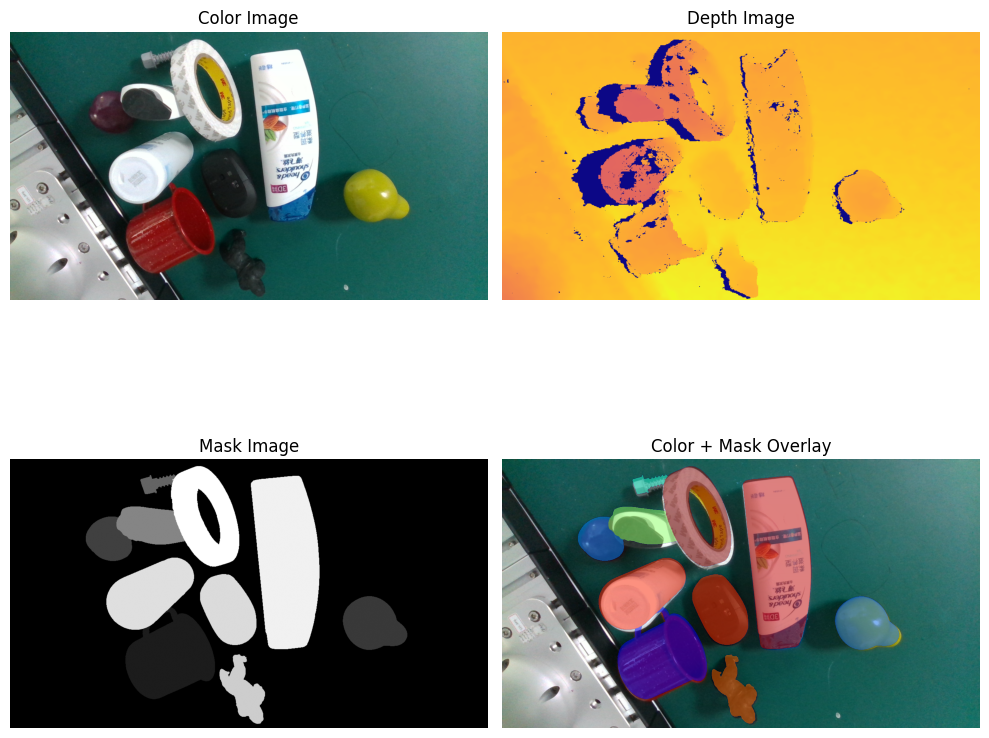

In [20]:
plot_rgbd_mask(color_img.data, depth_img.data, mask_img)

In [29]:
action = env.action_space.sample()
action = np.array([0, 0, 0.3, np.pi/2, -np.pi/2, 0, 0.05])

Ok making progress, the next thing I need to do is make sure that the grasp frame of ref in camera frame is consitent!!!



In [30]:
obs, reward, terminated, truncated, info = env.step(action)

Using cached scene models
Scene scene_0099, realsense
Mean Accuracy for scene:0099 ann:0089 = 0.000

How does the scoring work?

‘scores’ records the minimum coefficient of friction between the gripper and object to achieve a stable grasp.

the LOWER the friction coefficient is, the better the grasp is.



In [8]:
print("Obs: ", obs.keys())


Obs:  dict_keys(['color', 'depth', 'mask', 'bg_depth', 'camera_info'])


In [ ]:


o3d_view_rgbd_mask(obs['camera_info'], obs['color'], obs['depth'], obs['mask'], None, obs['bg_depth'])